In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


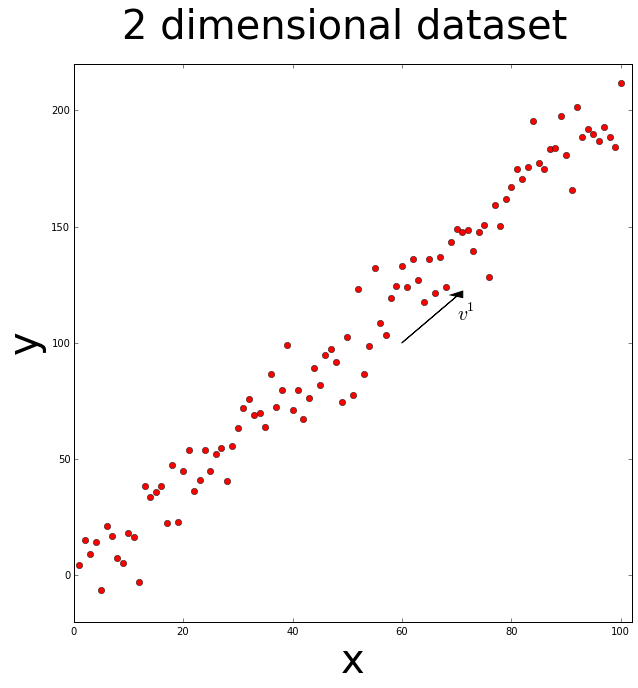

In [2]:
 
#line y = 2*x
x = np.arange(1,101,1).astype(float)
y = 2*np.arange(1,101,1).astype(float)
#add noise
noise = np.random.normal(0, 10, 100)
y += noise

fig = plt.figure(figsize=(10,10))
#plot
plt.plot(x,y,'ro')
plt.axis([0,102, -20,220])
plt.quiver(60, 100,10-0, 20-0, scale_units='xy', scale=1)
plt.arrow(60, 100,10-0, 20-0,head_width=2.5, head_length=2.5, fc='k', ec='k')
plt.text(70, 110, r'$v^1$', fontsize=20)

#save
ax = fig.add_subplot(111)
ax.axis([0,102, -20,220])
ax.set_xlabel('x',fontsize=40)
ax.set_ylabel('y',fontsize=40)
fig.suptitle('2 dimensional dataset',fontsize=40)
fig.savefig('pca_data.png')

In [3]:
#calc PCA
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_vector = np.array([[mean_x],[mean_y]])
u_x = (x- mean_x)/np.std(x)
u_y = (y-mean_y)/np.std(y)
sigma = np.cov([u_x,u_y])
print sigma
eig_vals, eig_vecs = np.linalg.eig(sigma)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i])
             for i in range(len(eig_vals))]
             
eig_pairs.sort()
eig_pairs.reverse()
print eig_pairs
v1 = eig_pairs[0][1]
#leading eigenvector:
x_v1 = v1[0]*np.std(x)+mean_x
y_v1 = v1[1]*np.std(y)+mean_y
print 'slope:',(y_v1)/(x_v1)

from sklearn.decomposition import PCA
#X = np.array([x,y])
X = np.array([u_x,u_y])
X = X.T
#print X
pca = PCA(n_components=1)
pca.fit(X)
V = pca.components_
print V,'-',V[0][1]/V[0][0]
#transform in reduced space
X_red_sklearn = pca.fit_transform(X)
print X_red_sklearn.shape

W = np.array(v1.reshape(2,1))
X_red = W.T.dot(X.T)
#check the reduced matrices are equal
assert X_red.T.all() == X_red_sklearn.all(), 'problem with the pca algorithm'
print X_red.T[0],'-',X_red_sklearn[0]

[[ 1.01010101  0.99432117]
 [ 0.99432117  1.01010101]]
[(2.0044221787947896, array([-0.70710678, -0.70710678])), (0.015779841407231099, array([-0.70710678,  0.70710678]))]
slope: 1.96658726903
[[ 0.70710678  0.70710678]] - 1.0
(100, 1)
[ 2.35702215] - [-2.35702215]
